In [ ]:
#First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/content/drive/MyDrive/Movies/movies.csv')

In [ ]:
# Now let's take a look at the data

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [ ]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
df['budget']=df['budget'].fillna(0)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].fillna(0)
df['gross']=df['gross'].astype('int64')

df['votes']=df['votes'].fillna(0)
df['votes']=df['votes'].astype('int64')

In [ ]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [ ]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   
...                                 ...    ...      ...            ...   
7663   October 23, 2020 (United States)    3.1       18  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        0  James Randall   
7667    August 19, 2020 (United States)    5.7        7   Pereko Mosia   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000   
7664         Lisa Huston   Michael Saquella  United States          0   
7665        Lynno Lovert       Onyama Laura  United States      58750   
7666       James Randall      Christina Roz  United States      15000   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          0   

           gross                    company  runtime  
5445  2847246203      Twentieth Century Fox    162.0  
7445  2797501328             Marvel Studios    181.0  
3045  2201647264      Twentieth Century Fox    194.0  
6663  2069521700                  Lucasfilm    138.0  
7244  2048359754             Marvel Studios    149.0  
...          ...                        ...      ...  
7663           0                        NaN     90.0  
7664           0  Cactus Blue Entertainment     90.0  
7665           0           Embi Productions      NaN  
7666           0                        NaN    120.0  
7667           0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#drop any duplicates
df['company'].sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
447                                      Zoetrope Studios
302                                      Zoetrope Studios
724                                      Zoetrope Studios
520                                      Zoetrope Studios
352                                      Zoetrope Studios
332                                      Zoetrope Studios
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
6272                              Zentropa Entertainments
3698                              Zentropa Entertainments
6318                              Zentropa Entertainments
4829                              Zentropa Entertainments
6175                              Zentropa Entertainments
5471                              Zentropa Entertainments
6599                              Zentropa Entertainments
3368                              Zentropa Entertainments
5885                              Zentropa Entertainments
7283                              Zentropa Entertainments
4297                              Zentropa Entertainments
4995                              Zentropa Entertainments
1180                                 Zenith Entertainment
1175                                 Zenith Entertainment
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
6008                                          Yellow Bird
5575                                          Yellow Bird
5499                                          Yellow Bird
4637                                       Yash Raj Films
4618                                       Yash Raj Films
4990                            Yari Film Group Releasing
5410                                Yari Film Group (YFG)
7576                                     Yale Productions
3310                                X-Filme Creative Pool
5583                                X-Filme Creative Pool
7003                                X-Filme Creative Pool
4347                                X-Filme Creative Pool
6798    Wytwórnia Filmów Dokumentalnych i Fabularnych ...
6372                              Worldview Entertainment
7187                              Worldview Entertainment
6265                              Worldview Entertainment
6622                              Worldview Entertainment
6408                              Worldview Entertainment
6919                              Worldview Entertainment
4392                          World of Wonder Productions
4999                  World Wrestling Entertainment (WWE)
425                                   World Film Services
4581                                  Working Title Films
1400                                  Working Title Films
712                                   Working Title Films
6490                                  Working Title Films
6694                                  Working Title Films
6674                                  Working Title Films
3158                                          Working Dog
3749                                          Working Do

In [ ]:
#budget high correlation
#company High correlation

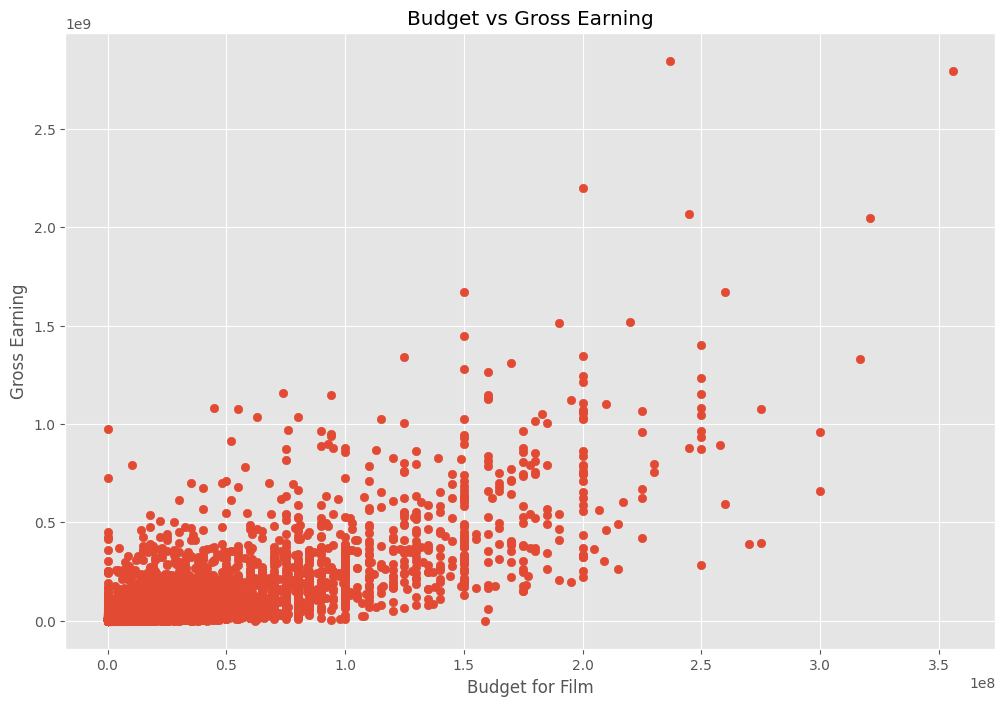

In [ ]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')

# x khassou ikoun houwa l-budget
plt.xlabel('Budget for Film')

# y khassou ikoun houwa l-gross
plt.ylabel('Gross Earning')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

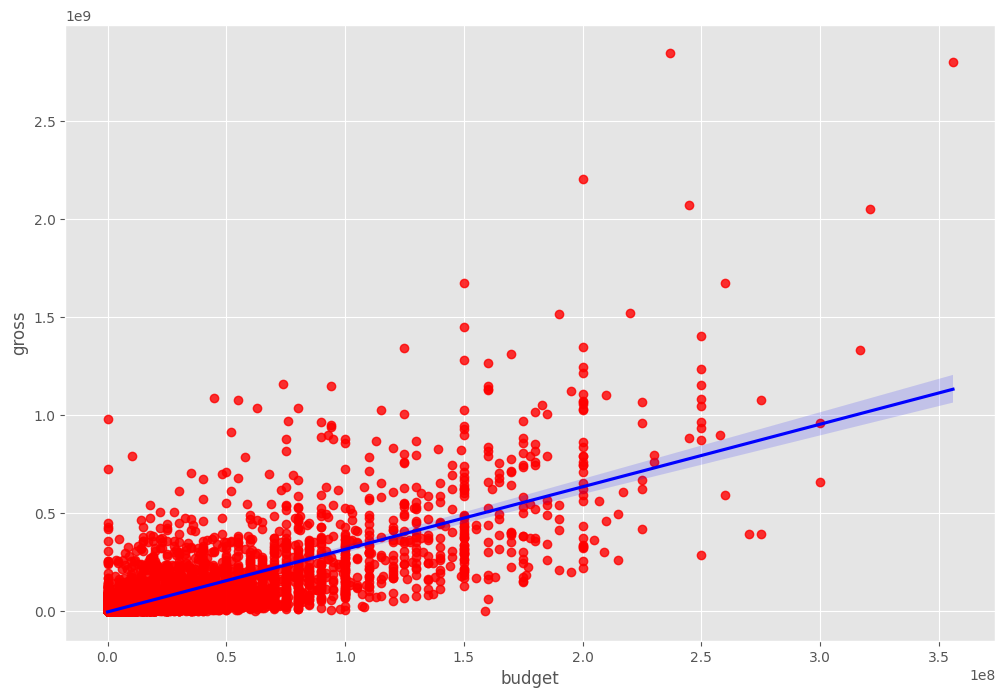

In [ ]:
# plot budget vs gross using Seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
#start looking at correlation

df.corr(method='pearson',numeric_only=True)  #pearson (default),  spearman, kendall

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222427  0.409182  1.000000  0.486931  0.632870  0.309122
budget   0.309212  0.055665  0.486931  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632870  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309122  0.269510  0.245235  1.000000

In [ ]:
#high correlation between budget and gross
# I was Correct


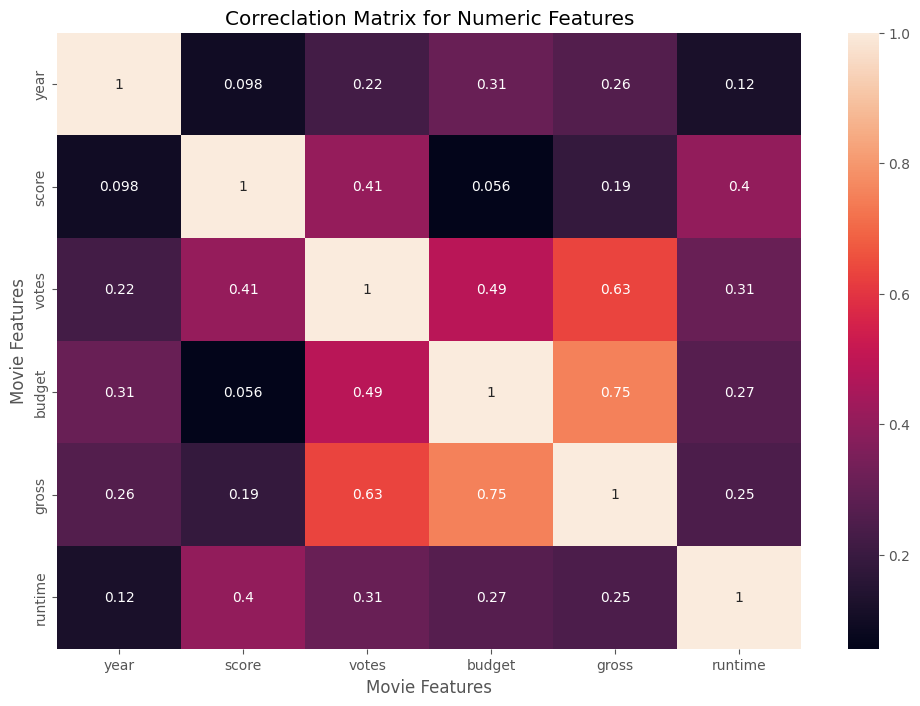

In [ ]:
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correclation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# look at company
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [ ]:
df_numrized = df
for col_name in df_numrized.columns:
  if(df_numrized[col_name].dtypes == 'object'):
    df_numrized[col_name] = df_numrized[col_name].astype('category')
    df_numrized[col_name] = df_numrized[col_name].cat.codes

df_numrized

name  rating  genre  year  released  score    votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000      2589    4014   
1     5573       6      1  1980      1492    5.8    65000      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000      1111    2567   
3      286       4      4  1980      1492    7.7   221000      1301    2000   
4     1027       6      4  1980      1543    7.3   108000      1054     521   
5     2109       6     10  1980      2502    6.4   123000      2528    4362   
6     5574       6      0  1980      1771    7.9   188000      1412     838   
7     4436       6      3  1980       699    8.2   330000      1829    1769   
8     5281       4      0  1980      1753    6.8   101000      2306    1979   
9     6213       6      3  1980      2286    7.0    10000      2864     423   
10     463       4      0  1980       674    6.1    18000       357    3985   
11    5920       4      1  1980      2987    7.3    54000      1199    1832   
12    4315       4      1  1980       626    5.3    30000      2352    2333   
13    4084       6      6  1980      3211    7.7    49000      2388    2327   
14    1687       6      5  1980      1543    7.1    37000       318     520   
15    5024       4      6  1980      3021    7.2    27000      1243    3548   
16    1900       6      6  1980      2286    6.6    21000        49     735   
17      92       4      4  1980       699    6.9    29000       514    3262   
18    5865       6     10  1980      1108    6.8    66000      1374    2104   
19    5189       6      4  1980       626    6.8    26000      2561     556   
20    1387       6      5  1980       945    6.5    20000      2891    4451   
21    2451       6      1  1980       160    6.8    14000      1892    2926   
22    5845       4      0  1980       281    6.7    22000       744    4192   
23    7445       4      8  1980       585    5.3    12000      2371    3528   
24    7127       4      6  1980      1913    6.4    14000      1153      12   
25     346       6     10  1980       773    6.9    33000      1583    3234   
26    3263       6      4  1980      2059    6.5     5100      2433    2483   
27    4442       4      0  1980       281    5.0     4100      1282      33   
28     980       6      5  1980      1771    7.2    17000      2673    4386   
29     362       6      5  1980       886    6.2    22000      2151    3326   
30    3796       4      4  1980      3296    7.1     8900      2811      83   
31    4373       6     10  1980      1467    5.4    16000      2143    4455   
32    4987       4      0  1980       342    5.3    15000      1041    1587   
33    1103       4      6  1980       160    6.1      604      1644     958   
34    4785       4      4  1980       699    6.7     9100      1225    3136   
35    4362       6      4  1980      2818    6.2    24000      1091    3107   
36    6008       6      4  1980      2452    6.3     4300       855    1358   
37    3721       6      4  1980      2965    6.0    11000      1598    3642   
38    6102       4      6  1980       699    5.9     4000      2296    3826   
39    1244       4      3  1980      2195    7.5    17000      1884    4201   
40    6748       4      7  1980      3101    6.3     5700      1403     518   
41     927       4      6  1980      1588    7.9    13000       335    2252   
42    6644       6      0  1980      1836    7.1     9000      2314    2543   
43    7305       6      3  1980       169    6.6    11000       186    1682   
44    5504       6     10  1980      3042    4.8     2000      1978     151   
45    1152       6      4  1980      1467    6.1    12000      2804    4298   
46    6094       6      0  1980      1705    5.3     3900      1934    3357   
47    5578       6     10  1980      2775    4.6     3900      2836    4344   
48    6360       4      0  1980      2502    5.1     3100       509    2893   
49    3253       4      3  1980      2287    8.3    1500

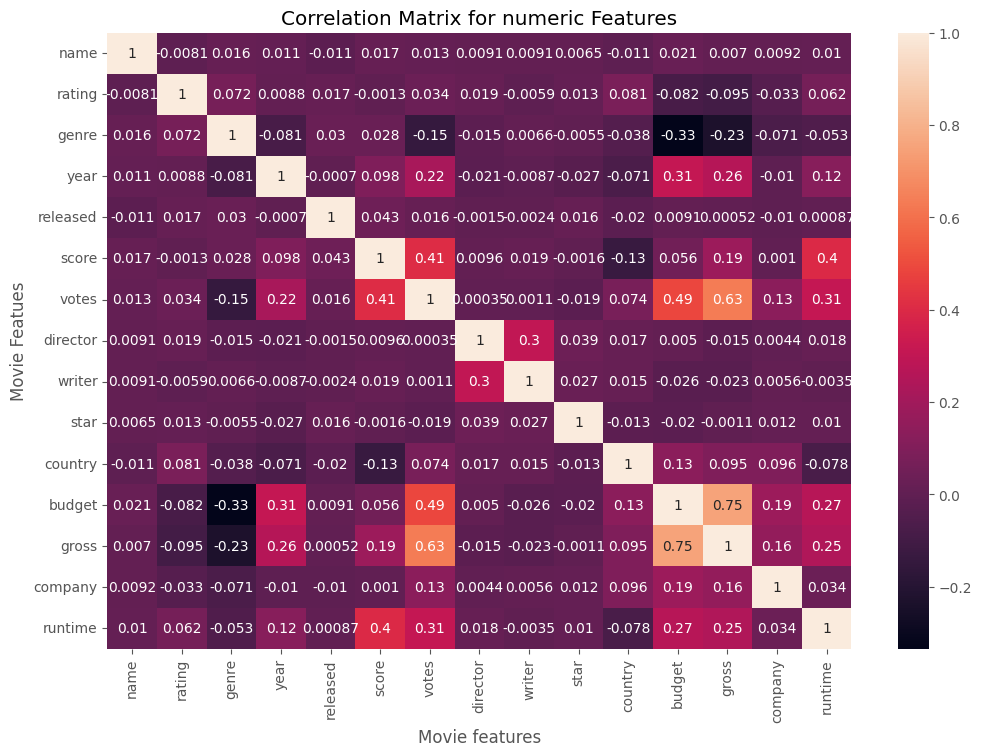

In [ ]:
correlation_matrix=df_numrized.corr(method='pearson')
plt.title('Correlation Matrix for numeric Features')
sns.heatmap(correlation_matrix,annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie Featues')
plt.show()

In [ ]:
# Correclation sort
matrix_corr=df_numrized.corr()
matrix_corr= matrix_corr.unstack()
matrix_corr

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
          genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027965
          votes      -0.145296
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          budget     -0.334021
          gross      -0.234297
          company    -0.071067
          runtime    -0.052711
year      name        0.011453
          rating      0.008779
          genre      -0.081261
          year        1.000000
          released   -0.000695
          score       0.097995
          votes       0.222427
          director   -0.020795
          writer     -0.008656
          star       -0.027242
          country    -0.070938
          budget      0.309212
          gross       0.261900
          company    -0.010431
          runtime     0.120811
released  name       -0.011311
          rating      0.016613
          genre       0.029822
          year       -0.000695
          released    1.000000
          score       0.042788
          votes       0.015878
          director   -0.001478
          writer     -0.002404
          star        0.015777
          country    -0.020427
          budget      0.009145
          gross       0.000519
          company    -0.010474
          runtime     0.000868
score     name        0.017097
          rating     -0.001314
          genre       0.027965
          year        0.097995
          released    0.042788
          score       1.000000
          votes       0.409182
          director    0.009559
          writer      0.019416
          star       -0.001609
          country    -0.133348
          budget      0.055665
          gross       0.186392
          company     0.001030
          runtime     0.399451
votes     name        0.013038
          rating      0.033743
          genre      -0.145296
          year        0.222427
          released    0.015878
          score       0.409182
          votes       1.000000
          director    0.000349
          writer      0.001127
          star       -0.019146
          country     0.073525
          budget      0.486931
          gross       0.632870
          company     0.133457
          runtime     0.309122
director  name        0.009079
          rating      0.019483
          genre      -0.015258
          year       -0.020795
          released   -0.001478
          score       0.009559
          votes       0.000349
          director    1.000000
          writer      0.299067
          star        0.039234
          country     0.017490
          budget      0.004976
          gross      -0.014916
          company     0.004404
          runtime     0.017624
writer    name        0.009081
          rating     -0.005921
          genre       0.006567
          year       -0.008656
          released   -0.002404
          score       0.019416
          votes       0.001127
          director    0.299067
          writer      1.000000
 

In [ ]:
sorted_pair= matrix_corr.sort_values()
sorted_pair


genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145296
votes     genre      -0.145296
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.095450
rating    gross      -0.095450
          budget     -0.081939
budget    rating     -0.081939
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
writer    budget     -0.025911
budget    writer     -0.025911
gross     writer     -0.022997
writer    gross      -0.022997
director  year       -0.020795
year      director   -0.020795
country   released   -0.020427
released  country    -0.020427
star      budget     -0.019952
budget    star       -0.019952
votes     star       -0.019146
star      votes      -0.019146
genre     director   -0.015258
director  genre      -0.015258
gross     director   -0.014916
director  gross      -0.014916
star      country    -0.012998
country   star       -0.012998
released  name       -0.011311
name      released   -0.011311
          country    -0.010737
country   name       -0.010737
company   released   -0.010474
released  company    -0.010474
year      company    -0.010431
company   year       -0.010431
writer    year       -0.008656
year      writer     -0.008656
rating    name       -0.008069
name      rating     -0.008069
writer    rating     -0.005921
rating    writer     -0.005921
star      genre      -0.005477
genre     star       -0.005477
runtime   writer     -0.003511
writer    runtime    -0.003511
          released   -0.002404
released  writer     -0.002404
score     star       -0.001609
star      score      -0.001609
released  director   -0.001478
director  released   -0.001478
rating    score      -0.001314
score     rating     -0.001314
gross     star       -0.001129
star      gross      -0.001129
released  year       -0.000695
year      released   -0.000695
director  votes       0.000349
votes     director    0.000349
gross     released    0.000519
released  gross       0.000519
          runtime     0.000868
runtime   released    0.000868
company   score       0.001030
score     company     0.001030
votes     writer      0.001127
writer    votes       0.001127
director  company     0.004404
company   director    0.004404
budget    director    0.004976
director  budget      0.004976
company   writer      0.005646
writer    company     0.005646
name      star        0.006472
star      name        0.006472
writer    genre       0.006567
genre     writer      0.006567
gross     name        0.006989
name      gross       0.006989
year      rating      0.008779
rating    year        0.008779
name      director    0.009079
director  name        0.009079
writer    name        0.009081
name      writer      0.009081
released  budget      0.009145
budget    released    0.009145
company   name        0.009211
name      company     0.009211
director  score       0.009559
score     director    0.009559
runtime   star        0.010174
star      runtime     0.010174
name      runtime     0.010392
runtime   name        0.010392
name      year        0.011453
year      name        0.011453
star      company     0.012442
company   star        0.012442
votes     name        0.013038
name      votes       0.013038
star      rating      0.013405
rating    star        0.013405
writer    country     0.015343
country   writer      0.015343
released  star        0.015777
star      released    0.015777
votes     released    0.015878
released  votes       0.015878
name      genre       0.016355
g

In [ ]:
heigh_corr= sorted_pair[(sorted_pair)>0.5]
heigh_corr

votes     gross       0.632870
gross     votes       0.632870
budget    gross       0.750157
gross     budget      0.750157
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budget have the heighest correlation to gross earning

# Company has no correlation
# I was Wrong